In [98]:
import pandas as pd
import numpy as np
import math
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as cms
from sklearn.preprocessing import MinMaxScaler
# For z-score scaling
from sklearn.preprocessing import StandardScaler
# For Box-Cox Normalization
from scipy import stats
# For Label Encoding
from sklearn import preprocessing
import pyarrow.csv as pv
import pyarrow.parquet as pq
from array import array
import itertools
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

In [105]:
maindata_original=pd.read_csv('2009_Accidents_UK.csv',index_col='accident_index',na_values=['NA','Missing','Data missing or out of range','-1'])
maindata =maindata_original.copy()
maindata

C:\Users\express\.conda\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (34) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200901BS70001,2009,01BS70001,524910.0,180800.0,-0.201349,51.512273,Metropolitan Police,Serious,2,1,01/01/2009,Thursday,15:11,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,Unclassified,first_road_class is C or Unclassified. These r...,One way street,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002882
200901BS70002,2009,01BS70002,525050.0,181040.0,-0.199248,51.514399,Metropolitan Police,Serious,2,11,05/01/2009,Monday,10:59,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,C,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,Crossroads,Give way or uncontrolled,C,first_road_class is C or Unclassified. These r...,None within 50 metres,Zebra,Daylight,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002886
200901BS70003,2009,01BS70003,526490.0,177990.0,-0.179599,51.486668,Metropolitan Police,Slight,2,1,04/01/2009,Sunday,14:19,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,308,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002912
200901BS70004,2009,01BS70004,524800.0,180300.0,-0.203110,51.507804,Metropolitan Police,Serious,2,1,05/01/2009,Monday,08:10,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,402,Single carriageway,30.0,T or staggered junction,Auto traffic signal,B,450.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Other,Frost or ice,None,None,Urban,Yes,Non-trunk,E01002871
200901BS70005,2009,01BS70005,526930.0,177490.0,-0.173445,51.482076,Metropolitan Police,Serious,2,1,06/01/2009,Tuesday,17:25,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3212,Single carriageway,30.0,Crossroads,Auto traffic signal,A,3220.0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002840
200901BS70006,2009,01BS70006,526060.0,178730.0,-0.185525,51.493415,Metropolitan Police,Slight,2,3,01/01/2009,Thursday,11:48,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,Unclassified,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002839
200901BS70007,2009,01BS70007,526580.0,177270.0,-0.178561,51.480177,Metropolitan Police,Serious,2,1,08/01/2009,Thursday,13:58,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3220,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,A,3220.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002841
20090

In [ ]:
maindata=maindata.drop(["accident_year",'accident_reference','date','time','accident_severity'], axis='columns')
# Extract the non-categorical features (assuming they are all numeric)
non_cat_cols = [col for col in maindata.columns if maindata[col].dtype != 'object']
non_cat_df = maindata[non_cat_cols]

In [109]:
non_cat_df.columns

Index(['location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'number_of_vehicles', 'number_of_casualties',
       'speed_limit'],
      dtype='object')

In [20]:
maindata[maindata.columns.tolist()];

In [21]:
maindata.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,speed_limit
count,163554.0,163554.000000,1.635540e+05,163554.000000,163554.000000,163554.000000,163554.000000,163554.000000
mean,2009.0,438232.062683,3.036316e+05,-1.457306,52.620680,1.826229,1.358243,39.029434
std,0.0,95265.386994,1.636947e+05,1.401528,1.473920,0.716708,0.813896,14.090785
min,2009.0,65950.000000,1.053000e+04,-7.497461,49.914488,1.000000,1.000000,10.000000
25%,2009.0,374390.000000,1.785800e+05,-2.385782,51.493170,1.000000,1.000000,30.000000
50%,2009.0,437900.000000,2.774400e+05,-1.431932,52.388969,2.000000,1.000000,30.000000
75%,2009.0,521770.000000,3.992300e+05,-0.237324,53.488231,2.000000,1.000000,50.000000
max,2009.0,655230.000000,1.191030e+06,1.757915,60.598055,32.000000,48.000000,70.000000


In [22]:
maindata.describe(include= ['object'])

,accident_reference,police_force,accident_severity,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
count,163554,163554,163554,163554,163554,163554,163554,163554,162436,163554,...,163554,163554,160151,163402,163552,163551,163554,163548,144827,151825
unique,163554,51,3,365,7,1440,416,381,207,6,...,6,5,8,5,8,6,2,2,2,29738
top,01BS70001,Metropolitan Police,Slight,13/11/2009,Friday,17:00,Birmingham,Birmingham,Kent,A,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01000004
freq,1,22979,139500,692,26666,1609,3289,3289,4486,74149,...,136824,119518,128526,110283,159463,160623,104538,131531,132751,255


In [23]:
maindata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163554 entries, 200901BS70001 to 2009984150809
Data columns (total 35 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_year                                163554 non-null  int64  
 1   accident_reference                           163554 non-null  object 
 2   location_easting_osgr                        163554 non-null  float64
 3   location_northing_osgr                       163554 non-null  float64
 4   longitude                                    163554 non-null  float64
 5   latitude                                     163554 non-null  float64
 6   police_force                                 163554 non-null  object 
 7   accident_severity                            163554 non-null  object 
 8   number_of_vehicles                           163554 non-null  int64  
 9   number_of_casualties                         

In [24]:
n_unique = maindata.nunique()
n_unique

accident_year                                       1
accident_reference                             163554
location_easting_osgr                           38388
location_northing_osgr                          48198
longitude                                      151588
latitude                                       149802
police_force                                       51
accident_severity                                   3
number_of_vehicles                                 16
number_of_casualties                               22
date                                              365
day_of_week                                         7
time                                             1440
local_authority_district                          416
local_authority_ons_district                      381
local_authority_highway                           207
first_road_class                                    6
first_road_number                                3356
road_type                   

In [25]:
n_unique.idxmax()
# Column (accident reference) got the maximum value of uniqueness

'accident_reference'

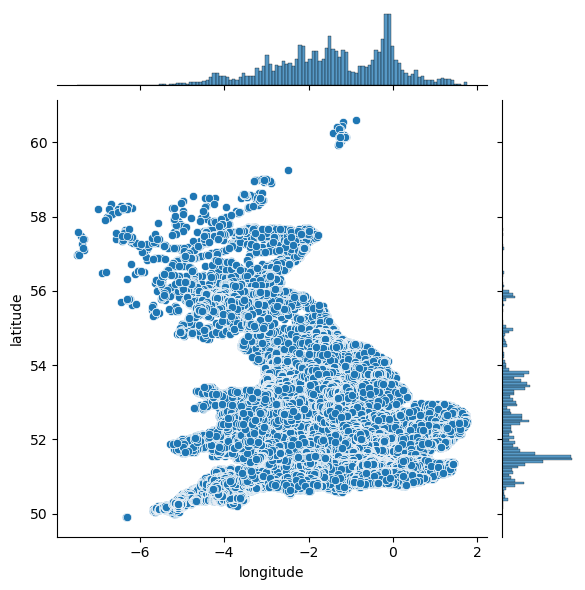

In [26]:
sns.jointplot(x='longitude',y='latitude',data=maindata)

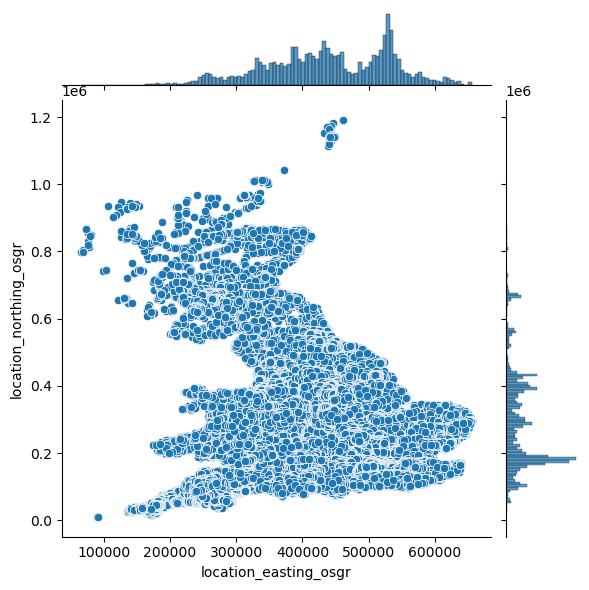

In [27]:
sns.jointplot(x='location_easting_osgr',y='location_northing_osgr',data=maindata)

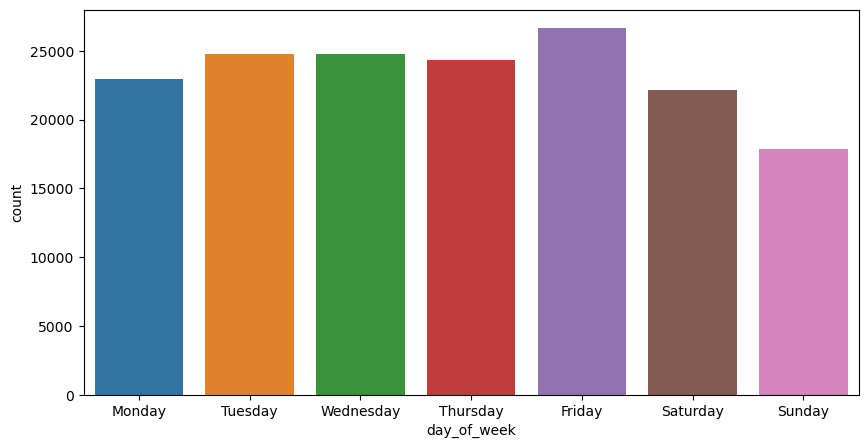

In [28]:
plt.figure(figsize=(10,5))
chart = sns.countplot(data=maindata,x="day_of_week",order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

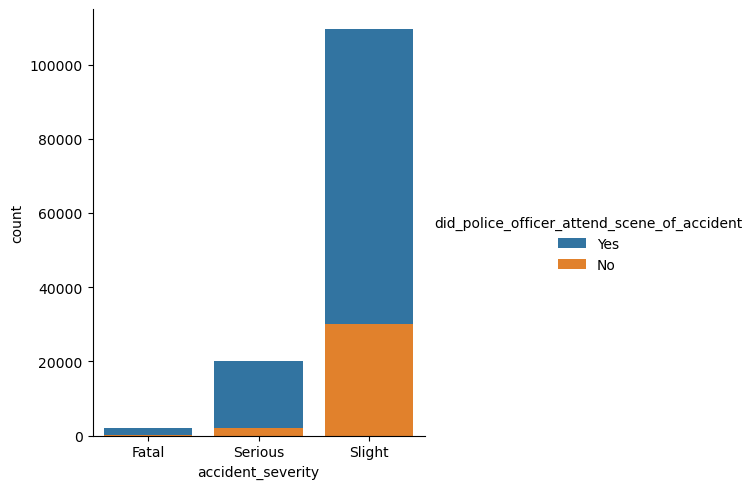

In [29]:
sns.FacetGrid(maindata,hue="did_police_officer_attend_scene_of_accident" ,height=5).map(sns.countplot,"accident_severity",order=['Fatal','Serious','Slight']).add_legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


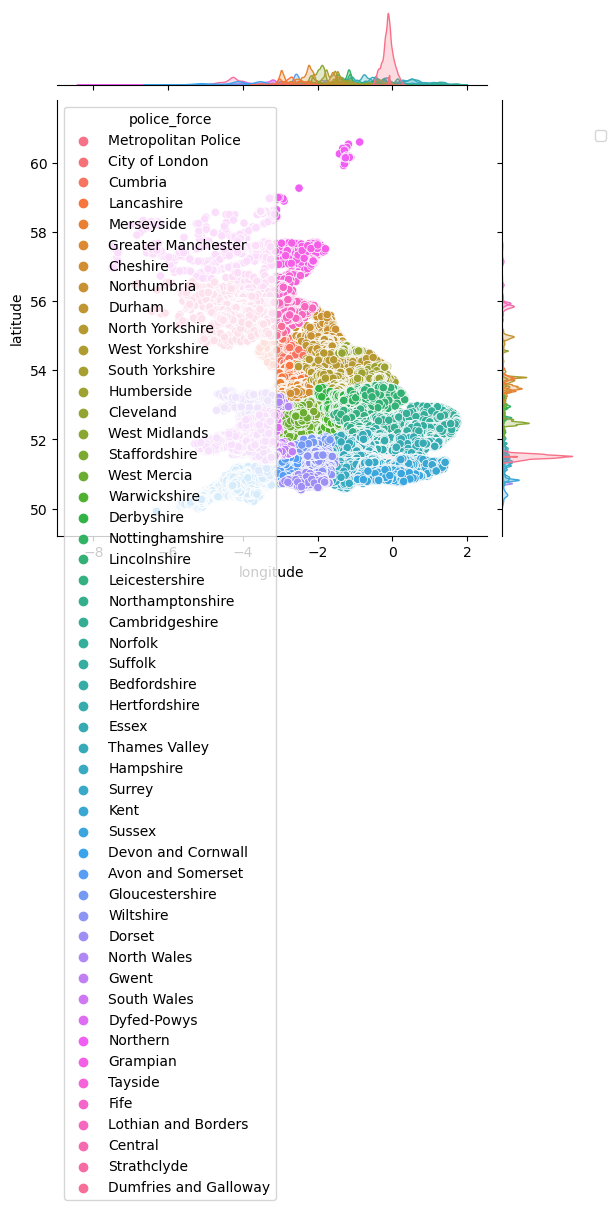

In [30]:
sns.jointplot(x='longitude', y='latitude', hue='police_force', data=maindata)
plt.legend(bbox_to_anchor=(1.5, 0.89), loc='lower right',ncol=3)

In [31]:
#cleaning

In [32]:
 len(maindata)

163554

In [33]:
maindata[maindata.duplicated()] 

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,


In [34]:
Columns_without_reference_and_year=maindata.columns[2:]

In [35]:
maindata[maindata.duplicated(Columns_without_reference_and_year)]

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,
2009130009509,2009,130009509,403470.0,416890.0,-1.948984,53.648498,West Yorkshire,Slight,1,1,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Frost or ice,None,None,Rural,Yes,Non-trunk,E01010955
200942I414912,2009,42I414912,545500.0,198960.0,0.102694,51.670526,Essex,Slight,1,1,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Frost or ice,Oil or diesel,None,Rural,Yes,Non-trunk,E01021803
200950JK2B002,2009,50JK2B002,266320.0,50980.0,-3.880130,50.343456,Devon and Cornwall,Slight,1,1,...,No physical crossing facilities within 50 metres,Darkness - no lighting,Other,Frost or ice,None,None,Rural,Yes,Non-trunk,E01020158
200997LB10812,2009,97LB10812,151420.0,745450.0,-6.044609,56.535175,Strathclyde,Slight,1,1,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Frost or ice,None,None,Rural,Yes,NaN,NaN


In [36]:
maindata=maindata.drop_duplicates(subset=Columns_without_reference_and_year,keep='last')

In [37]:
maindata[maindata.duplicated(subset=Columns_without_reference_and_year)]

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,


In [38]:
maindata[maindata.columns.tolist()]


,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,
200901BS70001,2009,01BS70001,524910.0,180800.0,-0.201349,51.512273,Metropolitan Police,Serious,2,1,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002882
200901BS70002,2009,01BS70002,525050.0,181040.0,-0.199248,51.514399,Metropolitan Police,Serious,2,11,...,Zebra,Daylight,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002886
200901BS70003,2009,01BS70003,526490.0,177990.0,-0.179599,51.486668,Metropolitan Police,Slight,2,1,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002912
200901BS70004,2009,01BS70004,524800.0,180300.0,-0.203110,51.507804,Metropolitan Police,Serious,2,1,...,Pedestrian phase at traffic signal junction,Daylight,Other,Frost or ice,None,None,Urban,Yes,Non-trunk,E01002871
200901BS70005,2009,01BS70005,526930.0,177490.0,-0.173445,51.482076,Metropolitan Police,Serious,2,1,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009984148209,2009,984148209,317240.0,576070.0,-3.297647,55.072192,Dumfries and Galloway,Serious,5,1,...,No physical crossing facilities within 50 metres,Darkness - no lighting,Fine no high winds,Dry,None,None,Rural,Yes,NaN,NaN
2009984148409,2009,984148409,330500.0,568750.0,-3.088242,55.008460,Dumfries and Galloway,Serious,1,1,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Frost or ice,None,None,Rural,Yes,NaN,NaN
2009984149109,2009,984149109,319510.0,567470.0,-3.259680,54.995302,Dumfries and Galloway,Slight,1,1,...,No physical crossing facilities within 50 metres,Daylight,Snowing + high winds,Frost or ice,None,None,Rural,Yes,NaN,NaN


In [39]:
null_list=(maindata.isnull().sum()/len(maindata)*100)
print(null_list)
clean_maindata=maindata

accident_year                                   0.000000
accident_reference                              0.000000
location_easting_osgr                           0.000000
location_northing_osgr                          0.000000
longitude                                       0.000000
latitude                                        0.000000
police_force                                    0.000000
accident_severity                               0.000000
number_of_vehicles                              0.000000
number_of_casualties                            0.000000
date                                            0.000000
day_of_week                                     0.000000
time                                            0.000000
local_authority_district                        0.000000
local_authority_ons_district                    0.000000
local_authority_highway                         0.683583
first_road_class                                0.000000
first_road_number              

In [40]:
cols=maindata.columns.tolist()
datatype=[]*len(cols)  
datatype=maindata.dtypes.values    
print(datatype)

[dtype('int64') dtype('O') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('O') dtype('O') dtype('int64')
 dtype('int64') dtype('O') dtype('O') dtype('O') dtype('O') dtype('O')
 dtype('O') dtype('O') dtype('O') dtype('O') dtype('float64') dtype('O')
 dtype('O') dtype('O') dtype('O') dtype('O') dtype('O') dtype('O')
 dtype('O') dtype('O') dtype('O') dtype('O') dtype('O') dtype('O')
 dtype('O') dtype('O')]


In [41]:
index_of_cols_with_nan=[];
cols_with_nan=[];
p_cols_with_nan=[];
for i in range(len(cols)):
    if maindata[cols[i]].isnull().values.any() == True:
            index_of_cols_with_nan.append(i)
            cols_with_nan.append(cols[i])
            p_cols_with_nan.append(null_list[i])
print(index_of_cols_with_nan) 
print(cols_with_nan)
print(p_cols_with_nan)

[15, 18, 21, 22, 23, 27, 28, 29, 30, 32, 33, 34]
['local_authority_highway', 'road_type', 'junction_control', 'second_road_class', 'second_road_number', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'lsoa_of_accident_location']
[0.6835830021400183, 0.5619076734943442, 31.523693060226233, 41.563436258025064, 41.56465912564965, 2.080709263222256, 0.09293793946805258, 0.0012228676245796392, 0.001834301436869459, 0.003668602873738918, 11.449709568939163, 7.170895750535005]


In [42]:
maindata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163550 entries, 200901BS70001 to 2009984150809
Data columns (total 35 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_year                                163550 non-null  int64  
 1   accident_reference                           163550 non-null  object 
 2   location_easting_osgr                        163550 non-null  float64
 3   location_northing_osgr                       163550 non-null  float64
 4   longitude                                    163550 non-null  float64
 5   latitude                                     163550 non-null  float64
 6   police_force                                 163550 non-null  object 
 7   accident_severity                            163550 non-null  object 
 8   number_of_vehicles                           163550 non-null  int64  
 9   number_of_casualties                         

In [43]:
maindata['junction_detail'].value_counts()

Not at junction or within 20 metres    66319
T or staggered junction                50563
Crossroads                             15554
Roundabout                             14451
Private drive or entrance               5548
Other junction                          4872
Slip road                               2281
More than 4 arms (not roundabout)       2269
Mini-roundabout                         1693
Name: junction_detail, dtype: int64

In [44]:
maindata['junction_control'].value_counts()

Give way or uncontrolled               79098
Auto traffic signal                    16769
Not at junction or within 20 metres    14932
Stop sign                                944
Authorised person                        250
Name: junction_control, dtype: int64

In [45]:
clean_maindata['junction_control'] = clean_maindata['junction_control'].fillna(value='Not at junction or within 20 metres')

C:\Users\express\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
clean_maindata['junction_control'] 

accident_index
200901BS70001               Give way or uncontrolled
200901BS70002               Give way or uncontrolled
200901BS70003               Give way or uncontrolled
200901BS70004                    Auto traffic signal
200901BS70005                    Auto traffic signal
                                ...                 
2009984148209    Not at junction or within 20 metres
2009984148409               Give way or uncontrolled
2009984149109    Not at junction or within 20 metres
2009984150109                    Auto traffic signal
2009984150809    Not at junction or within 20 metres
Name: junction_control, Length: 163550, dtype: object

In [47]:
clean_maindata['second_road_number'] = clean_maindata['second_road_number'].fillna(value='Not available')

C:\Users\express\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
maindata[(maindata['trunk_road_flag']=='Trunk (Roads managed by Highways England)')]['speed_limit'].value_counts()/len(maindata[(maindata['trunk_road_flag']=='Trunk (Roads managed by Highways England)')]['speed_limit'])
#70 percent of the trunk roads has a speed limit of 70


70.0    0.703461
60.0    0.141769
50.0    0.052501
40.0    0.051259
30.0    0.050845
20.0    0.000166
Name: speed_limit, dtype: float64

In [49]:
maindata[(maindata['trunk_road_flag']=='Non-trunk')]['speed_limit'].value_counts()/len(maindata[(maindata['trunk_road_flag']=='Non-trunk')]['speed_limit'])
    #71 percent of the non-trunk roads have a speed limit of 30

30.0    0.710662
60.0    0.143151
40.0    0.089719
50.0    0.030871
70.0    0.015729
20.0    0.009868
Name: speed_limit, dtype: float64

In [50]:
maindata[(maindata['trunk_road_flag'].isna())]['speed_limit'].value_counts()

30.0    10444
60.0     5375
70.0     1097
40.0     1019
50.0      591
20.0      196
10.0        2
15.0        2
Name: speed_limit, dtype: int64

C:\Users\express\.conda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='speed_limit'>

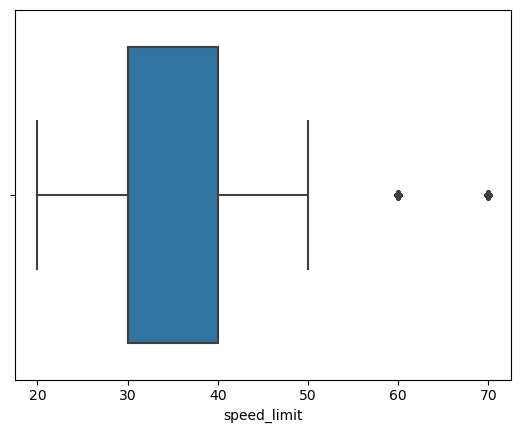

In [51]:
sns.boxplot(maindata[(maindata['trunk_road_flag']=='Non-trunk')]['speed_limit'])

C:\Users\express\.conda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='speed_limit'>

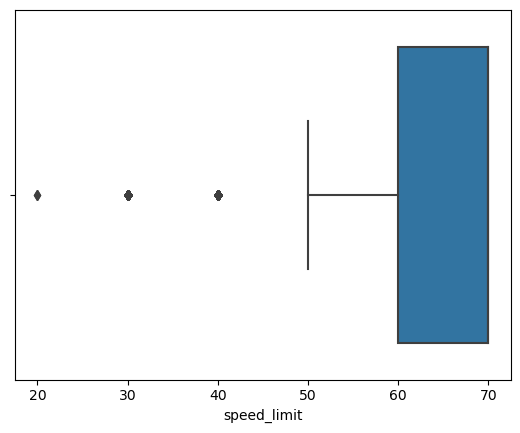

In [52]:
sns.boxplot(maindata[(maindata['trunk_road_flag']=='Trunk (Roads managed by Highways England)')]['speed_limit'])

In [53]:
condition=clean_maindata['speed_limit'].values.any() >= 50 and clean_maindata['speed_limit'].values.any()==np.nan

In [54]:
clean_maindata['trunk_road_flag'] = np.where( condition , "Non-trunk","Trunk (Roads managed by Highways England)" )

C:\Users\express\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
clean_maindata

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,
200901BS70001,2009,01BS70001,524910.0,180800.0,-0.201349,51.512273,Metropolitan Police,Serious,2,1,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Trunk (Roads managed by Highways England),E01002882
200901BS70002,2009,01BS70002,525050.0,181040.0,-0.199248,51.514399,Metropolitan Police,Serious,2,11,...,Zebra,Daylight,Fine no high winds,Wet or damp,None,None,Urban,Yes,Trunk (Roads managed by Highways England),E01002886
200901BS70003,2009,01BS70003,526490.0,177990.0,-0.179599,51.486668,Metropolitan Police,Slight,2,1,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Trunk (Roads managed by Highways England),E01002912
200901BS70004,2009,01BS70004,524800.0,180300.0,-0.203110,51.507804,Metropolitan Police,Serious,2,1,...,Pedestrian phase at traffic signal junction,Daylight,Other,Frost or ice,None,None,Urban,Yes,Trunk (Roads managed by Highways England),E01002871
200901BS70005,2009,01BS70005,526930.0,177490.0,-0.173445,51.482076,Metropolitan Police,Serious,2,1,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Trunk (Roads managed by Highways England),E01002840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009984148209,2009,984148209,317240.0,576070.0,-3.297647,55.072192,Dumfries and Galloway,Serious,5,1,...,No physical crossing facilities within 50 metres,Darkness - no lighting,Fine no high winds,Dry,None,None,Rural,Yes,Trunk (Roads managed by Highways England),NaN
2009984148409,2009,984148409,330500.0,568750.0,-3.088242,55.008460,Dumfries and Galloway,Serious,1,1,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Frost or ice,None,None,Rural,Yes,Trunk (Roads managed by Highways England),NaN
2009984149109,2009,984149109,319510.0,567470.0,-3.259680,54.995302,Dumfries and Galloway,Slight,1,1,...,No physical crossing facilities within 50 metres,Daylight,Snowing + high winds,Frost or ice,None,None,Rural,Yes,Trunk (Roads managed by Highways England),NaN


In [56]:
case_study_cols=['junction_control', 'second_road_number', 'trunk_road_flag'] 
#we will take a look at these columns in particular so that we can see if they are MAR or MNAR. If any dataset is inputted, and one of these 
#columns are found , then we will assume that it has same case study as this dataset. If any coulmn has any missing data and not on this list
#it will be assumed as MNAR and arbritary imputation.
index_to_remove=[]
for i in case_study_cols:
    if(i in cols_with_nan): 
        p_cols_with_nan.pop(cols_with_nan.index(i))
        index_of_cols_with_nan.pop(cols_with_nan.index(i))
        cols_with_nan.remove(i)      
print(cols_with_nan)
print(p_cols_with_nan)
print(index_of_cols_with_nan)

['local_authority_highway', 'road_type', 'second_road_class', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'did_police_officer_attend_scene_of_accident', 'lsoa_of_accident_location']
[0.6835830021400183, 0.5619076734943442, 41.563436258025064, 2.080709263222256, 0.09293793946805258, 0.0012228676245796392, 0.001834301436869459, 0.003668602873738918, 7.170895750535005]
[15, 18, 22, 27, 28, 29, 30, 32, 34]


In [57]:
maindata[maindata.columns.tolist()]

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,
200901BS70001,2009,01BS70001,524910.0,180800.0,-0.201349,51.512273,Metropolitan Police,Serious,2,1,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Trunk (Roads managed by Highways England),E01002882
200901BS70002,2009,01BS70002,525050.0,181040.0,-0.199248,51.514399,Metropolitan Police,Serious,2,11,...,Zebra,Daylight,Fine no high winds,Wet or damp,None,None,Urban,Yes,Trunk (Roads managed by Highways England),E01002886
200901BS70003,2009,01BS70003,526490.0,177990.0,-0.179599,51.486668,Metropolitan Police,Slight,2,1,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Trunk (Roads managed by Highways England),E01002912
200901BS70004,2009,01BS70004,524800.0,180300.0,-0.203110,51.507804,Metropolitan Police,Serious,2,1,...,Pedestrian phase at traffic signal junction,Daylight,Other,Frost or ice,None,None,Urban,Yes,Trunk (Roads managed by Highways England),E01002871
200901BS70005,2009,01BS70005,526930.0,177490.0,-0.173445,51.482076,Metropolitan Police,Serious,2,1,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Trunk (Roads managed by Highways England),E01002840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009984148209,2009,984148209,317240.0,576070.0,-3.297647,55.072192,Dumfries and Galloway,Serious,5,1,...,No physical crossing facilities within 50 metres,Darkness - no lighting,Fine no high winds,Dry,None,None,Rural,Yes,Trunk (Roads managed by Highways England),NaN
2009984148409,2009,984148409,330500.0,568750.0,-3.088242,55.008460,Dumfries and Galloway,Serious,1,1,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Frost or ice,None,None,Rural,Yes,Trunk (Roads managed by Highways England),NaN
2009984149109,2009,984149109,319510.0,567470.0,-3.259680,54.995302,Dumfries and Galloway,Slight,1,1,...,No physical crossing facilities within 50 metres,Daylight,Snowing + high winds,Frost or ice,None,None,Rural,Yes,Trunk (Roads managed by Highways England),NaN


In [58]:
# These are the functions in order to handle the data to clean it and we will use these functions 
#in the main loop in order to be used under certain conditions.


In [59]:
def CCAcleaning(clean_maindata,column): #good ol' CCA 
    clean_maindata=clean_maindata.dropna(axis='index', subset=[column])
    return clean_maindata


# In[54]:


def meanImputation(clean_maindata,column):#mean imputation
    clean_maindata[column] = clean_maindata[column].fillna(value=clean_maindata[column].mean())
    return clean_maindata


# In[55]:


def medianImputation(clean_maindata,column): #median imputation
    clean_maindata[column] = clean_maindata[column].fillna(value=clean_maindata[column].median())
    return clean_maindata


# In[56]:


def arbcleaning(clean_maindata,column): # arbitrary value imputation on categorical columns
    clean_maindata[column] = clean_maindata[column].fillna('Missing')
    return clean_maindata


# In[57]:


def arbcleaningNormal(clean_maindata,column): # arbitrary value imputation on numerical normal distribution
    #finding max on normal distribution (mean+ 3*std variation)
    maximum_value =clean_maindata[column].mean() + clean_maindata[column].std() * 3
    maximum_value = maximum_value*100 # random scaling to make the imputation arbritary out and away of distribution  
    clean_maindata[column] = clean_maindata[column].fillna(maximum_value)
    return clean_maindata


# In[58]:


def arbcleaningIQR(clean_maindata,column): # arbitrary value imputation on numerical normal distribution
    #finding max on Boxplot (Q3 + 1.5*IQR)
    Q1 = clean_maindata[column].quantile(0.25)
    Q3 = clean_maindata[column].quantile(0.75)
    IQR = Q3 - Q1
    cut_off = IQR * 1.5
    maximum_value =Q3 + cut_off
    maximum_value = maximum_value*100 # random scaling to make the imputation arbritary out and away of boxplot 
    clean_maindata[column] = clean_maindata[column].fillna(maximum_value)
    return clean_maindata


In [60]:
#main cleaning loop (any general case)
for i in range(0,len(p_cols_with_nan)):
    if(p_cols_with_nan[i]<=5): #MCAR conditions
        if(datatype[index_of_cols_with_nan[i]]=='O' or datatype[index_of_cols_with_nan[i]]=='str'):
            clean_maindata=CCAcleaning(clean_maindata,cols[index_of_cols_with_nan[i]])
        elif(datatype[index_of_cols_with_nan[i]]=='int64' or datatype[index_of_cols_with_nan[i]]=='float64' ):
            #check skewness first
            if((maindata[cols[index_of_cols_with_nan[i]]].skew())<1 and (maindata[cols[index_of_cols_with_nan[i]]].skew())>-1 ):
                clean_maindata=meanImputation(clean_maindata,cols[index_of_cols_with_nan[i]])
            else:
                clean_maindata=medianImputation(clean_maindata,cols[index_of_cols_with_nan[i]])
        else:
            print("Unidentified datatype")#dummy else-statement
    else:#assume all missing above 5% is MNAR if not in case study
        if(datatype[index_of_cols_with_nan[i]]=='O' or datatype[index_of_cols_with_nan[i]]=='str'):
            clean_maindata=arbcleaning(clean_maindata,cols[index_of_cols_with_nan[i]])
        elif(datatype[index_of_cols_with_nan[i]]=='int64' or datatype[index_of_cols_with_nan[i]]=='float64' ):
            if((maindata[cols[index_of_cols_with_nan[i]]].skew())<1 and (maindata[cols[index_of_cols_with_nan[i]]].skew())>-1 ):
                clean_maindata=arbcleaningNormal(clean_maindata,cols[index_of_cols_with_nan[i]])
            else:
                clean_maindata=arbcleaningIQR(clean_maindata,cols[index_of_cols_with_nan[i]])
        else:
            print("Unidentified datatype")#dummy else-statement

In [61]:
cols[index_of_cols_with_nan[0]]

'local_authority_highway'

In [62]:
clean_maindata.isnull().sum()/len(maindata)

accident_year                                  0.0
accident_reference                             0.0
location_easting_osgr                          0.0
location_northing_osgr                         0.0
longitude                                      0.0
latitude                                       0.0
police_force                                   0.0
accident_severity                              0.0
number_of_vehicles                             0.0
number_of_casualties                           0.0
date                                           0.0
day_of_week                                    0.0
time                                           0.0
local_authority_district                       0.0
local_authority_ons_district                   0.0
local_authority_highway                        0.0
first_road_class                               0.0
first_road_number                              0.0
road_type                                      0.0
speed_limit                    

In [63]:
clean_maindata[clean_maindata.columns.tolist()]

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,
200901BS70001,2009,01BS70001,524910.0,180800.0,-0.201349,51.512273,Metropolitan Police,Serious,2,1,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Trunk (Roads managed by Highways England),E01002882
200901BS70002,2009,01BS70002,525050.0,181040.0,-0.199248,51.514399,Metropolitan Police,Serious,2,11,...,Zebra,Daylight,Fine no high winds,Wet or damp,None,None,Urban,Yes,Trunk (Roads managed by Highways England),E01002886
200901BS70003,2009,01BS70003,526490.0,177990.0,-0.179599,51.486668,Metropolitan Police,Slight,2,1,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Trunk (Roads managed by Highways England),E01002912
200901BS70004,2009,01BS70004,524800.0,180300.0,-0.203110,51.507804,Metropolitan Police,Serious,2,1,...,Pedestrian phase at traffic signal junction,Daylight,Other,Frost or ice,None,None,Urban,Yes,Trunk (Roads managed by Highways England),E01002871
200901BS70005,2009,01BS70005,526930.0,177490.0,-0.173445,51.482076,Metropolitan Police,Serious,2,1,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Trunk (Roads managed by Highways England),E01002840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009984148209,2009,984148209,317240.0,576070.0,-3.297647,55.072192,Dumfries and Galloway,Serious,5,1,...,No physical crossing facilities within 50 metres,Darkness - no lighting,Fine no high winds,Dry,None,None,Rural,Yes,Trunk (Roads managed by Highways England),Missing
2009984148409,2009,984148409,330500.0,568750.0,-3.088242,55.008460,Dumfries and Galloway,Serious,1,1,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Frost or ice,None,None,Rural,Yes,Trunk (Roads managed by Highways England),Missing
2009984149109,2009,984149109,319510.0,567470.0,-3.259680,54.995302,Dumfries and Galloway,Slight,1,1,...,No physical crossing facilities within 50 metres,Daylight,Snowing + high winds,Frost or ice,None,None,Rural,Yes,Trunk (Roads managed by Highways England),Missing


In [64]:
# Transformation
clean_maindata["first_road_number"]

accident_index
200901BS70001    first_road_class is C or Unclassified. These r...
200901BS70002    first_road_class is C or Unclassified. These r...
200901BS70003                                                  308
200901BS70004                                                  402
200901BS70005                                                 3212
                                       ...                        
2009984148209                                                   74
2009984148409                                                   74
2009984149109                                                  722
2009984150109                                                  709
2009984150809    first_road_class is C or Unclassified. These r...
Name: first_road_number, Length: 158192, dtype: object

In [65]:
clean_maindata["second_road_number"]

accident_index
200901BS70001    first_road_class is C or Unclassified. These r...
200901BS70002    first_road_class is C or Unclassified. These r...
200901BS70003    first_road_class is C or Unclassified. These r...
200901BS70004                                                450.0
200901BS70005                                               3220.0
                                       ...                        
2009984148209                                        Not available
2009984148409    first_road_class is C or Unclassified. These r...
2009984149109                                        Not available
2009984150109                                                723.0
2009984150809                                        Not available
Name: second_road_number, Length: 158192, dtype: object

In [66]:
#first road number and second road number unlcassified data input fixation 
clean_maindata["first_road_number"]=clean_maindata["first_road_number"].replace('first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ','0')
clean_maindata["second_road_number"]=clean_maindata["second_road_number"].replace('first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ','0')


In [67]:
maindata=clean_maindata

In [68]:
## Observing outliers

In [69]:
# First, we will observe the outliers, in order to know where the outliers are and if we need to handle them or not.
# z-score and IQR is used for handling outliers for numerical discrete variables 
columns_that_needs_ouliers_handling = maindata[['number_of_casualties', 'number_of_vehicles', 'location_easting_osgr','location_northing_osgr']].copy()

easting is normally distributed 
 northing is Right skewed 
(158192, 2)
(158023, 2)
221780.0
No. of outliers in location northing using IQR:  2420
No. of outliers in location northing using IQR:  0


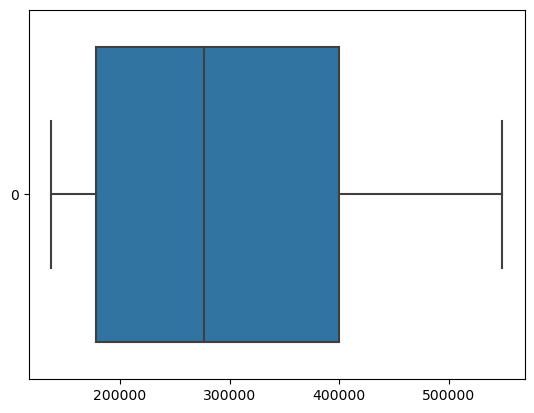

146680.0
No. of outliers in location easting using IQR:  198
No. of outliers in location northing using IQR:  0


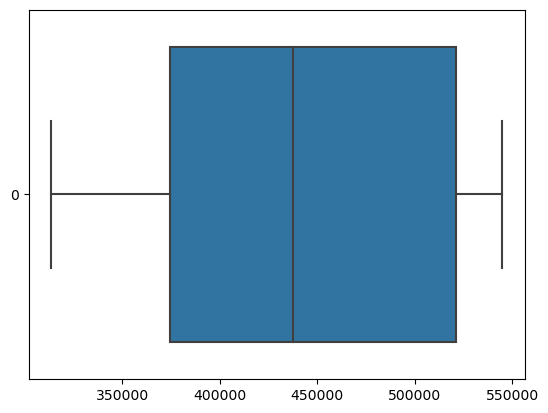

(158192, 2)
(158023, 2)


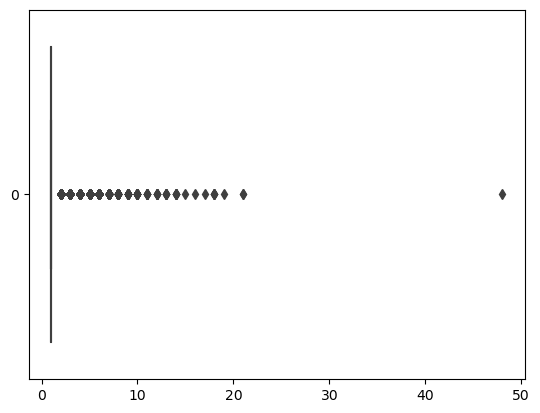

0.0
No. of outliers in number_of_casualties using IQR:  37752
No. of outliers in location number_of_casualties using IQR:  37752


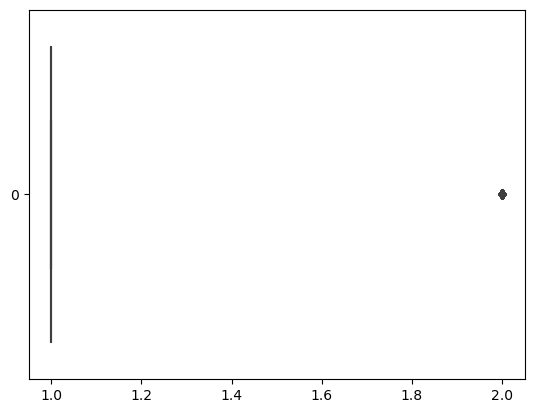

1.0
No. of outliers in number_of_vehicles using IQR:  3571
No. of outliers in number_of_vehicles using IQR:  0


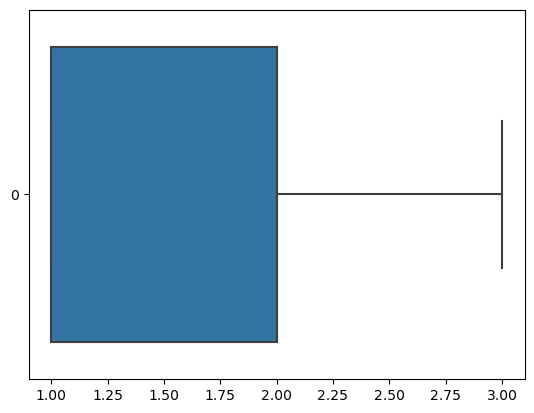

C:\Users\express\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:480: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


In [70]:
# ## Findings and conclusions

# The methodology used in cleaning:
# 1. if missing data is less than 5% then it's MCAR 
# 
# Numerical data type -> replace by mean in case of normal distribution and by median if it is not normally distributed   
# Categorical data type-> CCA
# 
# 2. else if missing data is more than 5% then case study is pereformed
# 
# relation exists -> MAR,multivarient imputation     
# No relation ->  MNAR,Missing label is used in case of categorical and a number outside the range is used in case of numerical. 

# ## Observing outliers

# First, we will observe the outliers, in order to know where the outliers are and if we need to handle them or not.
# z-score and IQR is used for handling outliers for numerical discrete variables 

# In[68]:


columns_that_needs_ouliers_handling = maindata[['number_of_casualties', 'number_of_vehicles', 'location_easting_osgr','location_northing_osgr']].copy()


# In[69]:


columns_that_needs_ouliers_handling.describe()


# In[70]:


# sns.boxplot(data = columns_that_needs_ouliers_handling, orient="h")
# # display
# plt.show()


# In[71]:


# for i in (columns_that_needs_ouliers_handling):
#     boxplot = sns.boxplot(data = columns_that_needs_ouliers_handling[i], orient="h")
#     plt.show()


# outliers exists in all above  boxplots

# cheking distribution of northing & easting 

# In[72]:


if(columns_that_needs_ouliers_handling["location_easting_osgr"].skew()<1 and (columns_that_needs_ouliers_handling["location_easting_osgr"].skew())>-1 ):
    print("easting is normally distributed ")
elif(columns_that_needs_ouliers_handling["location_easting_osgr"].skew()<=-1) :
    print("left skewed  ")
elif(columns_that_needs_ouliers_handling["location_easting_osgr"].skew()>1): 
    print("Right skewed  ")
if(columns_that_needs_ouliers_handling["location_northing_osgr"].skew()<1 and (columns_that_needs_ouliers_handling["location_northing_osgr"].skew())>-1 ):
    print("normally distributed")
elif(columns_that_needs_ouliers_handling["location_northing_osgr"].skew()<=-1) :
    print("left skewed ")
elif(columns_that_needs_ouliers_handling["location_northing_osgr"].skew()>1): 
    print(" northing is Right skewed ")



# using z-score for detecting outlier of easting as it is normally distributed

# In[73]:


outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers


# In[74]:


sample_outliers = detect_outliers_zscore(columns_that_needs_ouliers_handling['location_easting_osgr'])


# In[75]:


sample_outliers


# In[76]:


# # Creating dataset
# a = sample_outliers
# bin_list = np.linspace(min(sample_outliers), max(sample_outliers))
# # Creating histogram
# np.histogram(a, bin_list)
# hist, bins = np.histogram(a,bin_list)
# plt.hist(a,bin_list)
# plt.title("easting Histogram")
# # show plot
# plt.show()
# # printing histogram
# print()
# print (hist)
# print (bins)
# print()


# I'll consider the 'casualities' and 'number of vehicles' for the multivariate analysis
# If we take a look at a scatter plot, we can detect outliers by seeing the points that are away from the majority of the data points. 

# In[77]:


# fig, ax = plt.subplots(figsize=(16,8))
# ax.scatter(columns_that_needs_ouliers_handling['number_of_casualties'],columns_that_needs_ouliers_handling['number_of_vehicles'])
# ax.set_xlabel('number_of_casualties')
# ax.set_ylabel('number_of_vehicles')
# plt.show()


# In[78]:


df = maindata[['number_of_casualties', 'number_of_vehicles']].copy()
X = df[['number_of_casualties','number_of_vehicles']].values

lof = LocalOutlierFactor()
yhat = lof.fit_predict(X)

mask = yhat != -1
X_filtered = X[mask, :]

# summarize the shape of the updated dataset
print(X.shape)
print(X_filtered.shape)


# In[79]:


# # A visualization of the outliers
# plt.figure(figsize=(12,12))
# # plot the level sets of the decision function
# in_mask = [True if l == 1 else False for l in yhat]
# out_mask = [True if l == -1 else False for l in yhat]
# plt.title("Local Outlier Factor (LOF)")
# # inliers
# a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
#                 edgecolor = 'k', s = 30)
# # outliers
# b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
#                 edgecolor = 'k', s = 30)
# plt.axis('tight')
# plt.xlabel('number_of_casualties');
# plt.ylabel('number_of_vehicles');
# plt.show()


# In[80]:


# len(X[out_mask, 1])


# In[81]:


# len(X[out_mask, 0])


# 171 are the number of outliers 

# In[82]:


# len(X[in_mask, 0])


# In[83]:


# X[out_mask, 0]


# ## handling the  outliers of numerical variables

# In[84]:


Q1 = columns_that_needs_ouliers_handling['location_northing_osgr'].quantile(0.25)
Q3 =columns_that_needs_ouliers_handling['location_northing_osgr'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
arr_1 = columns_that_needs_ouliers_handling['location_northing_osgr'] < (Q1 - 1.5 * IQR)
arr_2 =columns_that_needs_ouliers_handling['location_northing_osgr'] > (Q3 + 1.5 * IQR)
mask = (arr_1 | arr_2)
print("No. of outliers in location northing using IQR: ", mask.sum())
floor = columns_that_needs_ouliers_handling['location_northing_osgr'] .quantile(0.10)
cap = columns_that_needs_ouliers_handling['location_northing_osgr'] .quantile(0.90)
floor,cap
boston_IQR_imp =columns_that_needs_ouliers_handling['location_northing_osgr'] .copy()
columns_that_needs_ouliers_handling['location_northing_osgr']  = np.where(columns_that_needs_ouliers_handling['location_northing_osgr']<floor, floor,columns_that_needs_ouliers_handling['location_northing_osgr'] )
columns_that_needs_ouliers_handling['location_northing_osgr']  = np.where(columns_that_needs_ouliers_handling['location_northing_osgr'] >cap,cap,columns_that_needs_ouliers_handling['location_northing_osgr'] )
arr_1 = columns_that_needs_ouliers_handling['location_northing_osgr']  < (Q1 - 1.5 * IQR)
arr_2 =columns_that_needs_ouliers_handling['location_northing_osgr']  > (Q3 + 1.5 * IQR)
mask = (arr_1 | arr_2)
print("No. of outliers in location northing using IQR: ", mask.sum())
boxplot = sns.boxplot(data = columns_that_needs_ouliers_handling['location_northing_osgr'] , orient="h")
plt.show()


# In[85]:


Q1 = columns_that_needs_ouliers_handling['location_easting_osgr'].quantile(0.25)
Q3 =columns_that_needs_ouliers_handling['location_easting_osgr'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
arr_1 = columns_that_needs_ouliers_handling['location_easting_osgr'] < (Q1 - 1.5 * IQR)
arr_2 =columns_that_needs_ouliers_handling['location_easting_osgr'] > (Q3 + 1.5 * IQR)
mask = (arr_1 | arr_2)
print("No. of outliers in location easting using IQR: ", mask.sum())
floor = columns_that_needs_ouliers_handling['location_easting_osgr'] .quantile(0.10)
cap = columns_that_needs_ouliers_handling['location_easting_osgr'] .quantile(0.90)
floor,cap
boston_IQR_imp =columns_that_needs_ouliers_handling['location_easting_osgr'] .copy()
columns_that_needs_ouliers_handling['location_easting_osgr']  = np.where(columns_that_needs_ouliers_handling['location_easting_osgr']<floor, floor,columns_that_needs_ouliers_handling['location_easting_osgr'] )
columns_that_needs_ouliers_handling['location_easting_osgr']  = np.where(columns_that_needs_ouliers_handling['location_easting_osgr'] >cap,cap,columns_that_needs_ouliers_handling['location_easting_osgr'] )
arr_1 = columns_that_needs_ouliers_handling['location_easting_osgr']  < (Q1 - 1.5 * IQR)
arr_2 =columns_that_needs_ouliers_handling['location_easting_osgr']  > (Q3 + 1.5 * IQR)
mask = (arr_1 | arr_2)
print("No. of outliers in location northing using IQR: ", mask.sum())
boxplot = sns.boxplot(data = columns_that_needs_ouliers_handling['location_easting_osgr'] , orient="h")
plt.show()


# In[86]:


# X[in_mask, 0]


# In[87]:


# X[in_mask, 1]


# In[88]:


medianC = np.median(columns_that_needs_ouliers_handling['number_of_casualties'])
medianv=np.median(columns_that_needs_ouliers_handling['number_of_vehicles'])


# In[89]:


df =  columns_that_needs_ouliers_handling[['number_of_casualties', 'number_of_vehicles']].copy()
X = df[['number_of_casualties','number_of_vehicles']].values

lof = LocalOutlierFactor()
yhat = lof.fit_predict(X)

mask = yhat != -1
X_filtered = X[mask, :]

# summarize the shape of the updated dataset
print(X.shape)
print(X_filtered.shape)


# In[90]:


# # A visualization of the outliers
# plt.figure(figsize=(12,12))
# # plot the level sets of the decision function
# in_mask = [True if l == 1 else False for l in yhat]
# out_mask = [True if l == -1 else False for l in yhat]
# plt.title("Local Outlier Factor (LOF)")
# # inliers
# a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
#                 edgecolor = 'k', s = 30)
# # outliers
# b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
#                 edgecolor = 'k', s = 30)
# plt.axis('tight')
# plt.xlabel('number_of_casualties');
# plt.ylabel('number_of_vehicles');
# plt.show()


# In[91]:


sample=columns_that_needs_ouliers_handling['number_of_casualties']
median = np.median(sample)# Replace with median
for i in sample_outliers:
    c = np.where(sample==i, median, sample)

boxplot = sns.boxplot(data = sample , orient="h")
plt.show()


# In[92]:


Q1 = columns_that_needs_ouliers_handling['number_of_casualties'].quantile(0.25)
Q3 =columns_that_needs_ouliers_handling['number_of_casualties'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
arr_1 = columns_that_needs_ouliers_handling['number_of_casualties'] < (Q1 - 1.5 * IQR)
arr_2 =columns_that_needs_ouliers_handling['number_of_casualties'] > (Q3 + 1.5 * IQR)
mask = (arr_1 | arr_2)
print("No. of outliers in number_of_casualties using IQR: ", mask.sum())
floor = columns_that_needs_ouliers_handling['number_of_casualties'] .quantile(0.10)
cap = columns_that_needs_ouliers_handling['number_of_casualties'] .quantile(0.90)
floor,cap
boston_IQR_imp =columns_that_needs_ouliers_handling['number_of_casualties'] .copy()
columns_that_needs_ouliers_handling['number_of_casualties']  = np.where(columns_that_needs_ouliers_handling['number_of_casualties']<floor, floor,columns_that_needs_ouliers_handling['number_of_casualties'] )
columns_that_needs_ouliers_handling['number_of_casualties']  = np.where(columns_that_needs_ouliers_handling['number_of_casualties'] >cap,cap,columns_that_needs_ouliers_handling['number_of_casualties'] )
arr_1 = columns_that_needs_ouliers_handling['number_of_casualties']  < (Q1 - 1.5 * IQR)
arr_2 =columns_that_needs_ouliers_handling['number_of_casualties']  > (Q3 + 1.5 * IQR)
mask = (arr_1 | arr_2)
print("No. of outliers in location number_of_casualties using IQR: ", mask.sum())
boxplot = sns.boxplot(data = columns_that_needs_ouliers_handling['number_of_casualties'] , orient="h")
plt.show()


# Thus the perfect way of handling casualities and number of vehcile to drop outliers appeared in the LOF factor not to replace by mean/median

# In[93]:


Q1 = columns_that_needs_ouliers_handling['number_of_vehicles'].quantile(0.25)
Q3 =columns_that_needs_ouliers_handling['number_of_vehicles'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
arr_1 = columns_that_needs_ouliers_handling['number_of_vehicles'] < (Q1 - 1.5 * IQR)
arr_2 =columns_that_needs_ouliers_handling['number_of_vehicles'] > (Q3 + 1.5 * IQR)
mask = (arr_1 | arr_2)
print("No. of outliers in number_of_vehicles using IQR: ", mask.sum())
floor = columns_that_needs_ouliers_handling['number_of_vehicles'] .quantile(0.10)
cap = columns_that_needs_ouliers_handling['number_of_vehicles'] .quantile(0.90)
floor,cap
boston_IQR_imp =columns_that_needs_ouliers_handling['number_of_vehicles'] .copy()
columns_that_needs_ouliers_handling['number_of_vehicles']  = np.where(columns_that_needs_ouliers_handling['number_of_vehicles']<floor, floor,columns_that_needs_ouliers_handling['number_of_vehicles'] )
columns_that_needs_ouliers_handling['number_of_vehicles']  = np.where(columns_that_needs_ouliers_handling['number_of_vehicles'] >cap,cap,columns_that_needs_ouliers_handling['number_of_vehicles'] )
arr_1 = columns_that_needs_ouliers_handling['number_of_vehicles']  < (Q1 - 1.5 * IQR)
arr_2 =columns_that_needs_ouliers_handling['number_of_vehicles']  > (Q3 + 1.5 * IQR)
mask = (arr_1 | arr_2)
print("No. of outliers in number_of_vehicles using IQR: ", mask.sum())
boxplot = sns.boxplot(data = columns_that_needs_ouliers_handling['number_of_vehicles'] , orient="h")
plt.show()


# In[94]:


columns_that_needs_ouliers_handling.describe()


# In[95]:


maindata['number_of_casualties']=columns_that_needs_ouliers_handling['number_of_casualties']
maindata['number_of_vehicles']=columns_that_needs_ouliers_handling['number_of_vehicles']
maindata['location_easting_osgr']=columns_that_needs_ouliers_handling['location_easting_osgr']
maindata['location_northing_osgr']=columns_that_needs_ouliers_handling['location_northing_osgr']


# We have described our data before and after handling the outliers, we found out that the properties values like (count, mean , etc..) changed and it was handled.

# Now all outliers are solved:)

# ## observing some of categorical outliers:

# In[96]:


# plt.figure(figsize=(10,5))
# sns.countplot(x='police_force',data=maindata)
# plt.xticks(rotation=90)
# plt.show()


# all counts that exists in  less than 5% of the total count can be categorized in a rare label  

# all counts that exists in  less than 5% of the total count can be categorized in a rare label if needed

# In[97]:


# plt.figure()
# sns.countplot(x='first_road_class',data=maindata)
# plt.xticks(rotation=90)
# plt.show()


# No outlier exists here

# In[98]:


# plt.figure()
# sns.countplot(x='road_type',data=maindata)
# plt.xticks(rotation=90)
# plt.show()


# No outlier exists here

# sliproad and one way street can be comined together in a rare label if needed in the machine learning process

# In[99]:


# plt.figure()
# sns.countplot(x='junction_detail',data=maindata)
# plt.xticks(rotation=90)
# plt.show()


# No outlier exists here

# In[100]:


# plt.figure()
# sns.countplot(x='junction_control',data=maindata)
# plt.xticks(rotation=90)
# plt.show()


# presense of authorised person here can be considered as an outlier and can be dropped or labeled in a rare label as in junction control it is not expected to have an authorised person in!

# Authorised person and stop sign  can be comined together in a rare label if needed in the machine learning process

# after plotting categorical outliers No need for handling them as their values are equally distributed!

# in conclusion no outliers in cateorical variable in this dataset

# ## Findings and conclusions

# IQR method was used in order to handle the outliers, it can be shown in the plots and can be seen visibly in the boxplot that they were handled.
# many technuiques used in detecting outliers such as Z-score,Box plot and denisty plot  

# # 4 - Data transformation

# all columns have same data type so no need for additional transformation

# ## 4.1 - Discretization

# to datetimeformate

# In[101]:


maindata['date']= pd.to_datetime(maindata['date'], format='%d/%m/%Y')


# adding column week number to discretize dates based on the week they present in.          
# note that the total year weeks is 53 

# In[102]:


maindata['weeknumber']= pd.to_datetime(maindata['date'], format='%d/%m/%Y').dt.week


# columns increased by one now and rows remain the same

# Displaying range of weeknumber values to insure that discretization is correct:

# In[103]:


maindata['weeknumber'].min()


# In[104]:


maindata['weeknumber'].max()


# adding column weekday to discretize dates based on the day they present in.          
# note that the total days perweek is 7

# In[105]:


maindata['weekday']= pd.to_datetime(maindata['date'], format='%d/%m/%Y').dt.weekday


# Displaying range of weekday values to insure that discretization is correct:

# In[106]:


maindata['weekday'].min()


# In[107]:


maindata['weekday'].max()


# Discretization is done through discretizing days based on seasons in uk:              
# Spring (March-3-,May-5-)               
# Summer (June-6-,August-8-)          
# Autumn (September-9-,November-11-)                
# Winter (December-12-,February-2-)

# In[108]:


months=pd.to_datetime(maindata['date'], format='%d/%m/%Y').dt.month
bins=[1,3,6,9,12]
labels=[1,2,3,4]
maindata['seasons'] = pd.cut(x=months,bins=bins,labels=labels,include_lowest=True)


# In[109]:


range_of_seasons = {
    1: '12-2', 
    2: '12-2', 
    3: '3-5',
    4: '3-5',
    5: '3-5',
    6: '6-8',
    7: '6-8',
    8: '6-8',
    9: '9-11',
    10: '9-11',
    11: '9-11',
    12: '12-2', 
}
maindata['seasons_ranges'] = maindata['seasons'].map(range_of_seasons)


# columns is now increased by two(seasons,seasons range)

# In[110]:


maindata[maindata.columns.tolist()]


# In[111]:


# plt.figure()
# sns.countplot(x=maindata['seasons'],data=maindata)
# plt.xticks(rotation=90)
# plt.show()


# more accidents are in winter

# In[112]:


maindata[maindata.columns.tolist()]


# visualization of discretized columns through count plots:
# monday->0,...sunday->6
# 

# In[113]:


# plt.figure()
# sns.countplot(x='weekday',data=maindata)
# plt.xticks(rotation=90)
# plt.show()


# weekdays after displaying labels is shown in the next figure
# 

# In[114]:


# plt.figure()
# my_xticks = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']
# ax=sns.countplot(x='weekday',data=maindata)
# plt.xticks(rotation=90)
# ax.set(xticklabels = my_xticks)
# plt.show()


# previous plt is similar to q2 plt,thus it's verified that our discretization is correct!

# In[115]:


# plt.figure(figsize=(18, 6))
# sns.countplot(x='weeknumber',data=maindata)
# plt.xticks(rotation=90)
# plt.show()


# May be the count of accidents in week 52, 53 and in week 1 is minimum due to the christmas break in this time.
# christmas break in Uk starts in December 19, and ends on Monday, January 2

# After descitizaation rows remain the same and columns increased by three(weekday,weeknumber and season)

# ## 4.11 - Findings and conclusions

# In order to do the discretization we changed the continous variables of the dates into week numbers (discrete values) and it changed the no. of it from 365 unique value in date into 53 unique value (1 to 53) in weeks.
# and also we discretized from the date (31 from the days in date) into 7  weekdays

# ## 4.2 - Encoding

# 1.day_of_week,accident_severity,light_conditions and road_surface_conditions is encoded using descriptive numerical values.

# In[116]:


# we will crreat our dictionary to assign descriptive numerical values to data
encoding_dictionary = {"day_of_week":{"Monday":1,"Tuesday":2,"Wednesday":3,"Thursday":4,"Friday":5,"Saturday":6,"Sunday":7},
                    "accident_severity":{"Slight": 1, "Serious": 2,"Fatal":3},
                    "light_conditions": {'Darkness - no lighting':1,'Darkness - lighting unknown':2,'Darkness - lights unlit':3,'Darkness - lights lit':4,'Daylight':5},#asuming that there is difference between lighting unknown and  lights unlit
                    "road_surface_conditions":{'Dry':1, 'Wet or damp':2,'Frost or ice':3, 'Snow':4,'Flood over 3cm. deep':5}}
maindata = maindata.replace(encoding_dictionary)


# In[117]:


maindata[maindata.columns.tolist()]


# columns and rows remain the same as replacing happend in the same column

# it doesnot make any sense to encode date ,time and accident_reference

# The rest of columns which has less than 3 different values is encoded using one hot encoding such as
# urban_or_rural_area                                 2   
# did_police_officer_attend_scene_of_accident         2   
# trunk_road_flag                                     2  
# pedestrian_crossing_human_control                   3 

# In[118]:


maindata = pd.get_dummies(data=maindata, columns=['urban_or_rural_area'])


# In[119]:


maindata[maindata.columns.tolist()]


# Now columns decreased by one and increased by two ,so total increase by one(urban or rural is replaced by two columns)

# In[120]:


maindata = pd.get_dummies(data=maindata, columns=['did_police_officer_attend_scene_of_accident'])
maindata[maindata.columns.tolist()]


# Now columns decreased by one and increased by two ,so total increase by one(did_police_officer_attend_scene_of_accident_No,did_police_officer_attend_scene_of_accident_Yes)

# Now columns decreased by one and increased by two ,so total increase by one(runk_road_flag_Non-trunk	trunk_road_flag_Trunk (Roads managed by Highways England)

# In[121]:


maindata = pd.get_dummies(data=maindata, columns=['pedestrian_crossing_human_control'])
maindata[maindata.columns.tolist()]
maindata = pd.get_dummies(data=maindata, columns=['trunk_road_flag'])


# In[122]:


maindata[maindata.columns.tolist()]


# Now columns decreased by one and increased by three ,so total increase of two (pedestrian_crossing_human_control_Control by other authorised person	pedestrian_crossing_human_control_Control by school crossing patrol	pedestrian_crossing_human_control_None within 50 metres)

# others is encoded using label encoding:   
# police_force                                       51   
# local_authority_district                          416   
# local_authority_ons_district                      381   
# local_authority_highway                           208   
# first_road_class                                    6   
# first_road_number                                3356   
# road_type                                           5   
# junction_detail                                     9   
# junction_control                                    5   
# second_road_class                                   7   
# second_road_number                               2734    
# pedestrian_crossing_physical_facilities             6   
# weather_conditions                                  8   
# special_conditions_at_site                          8   
# carriageway_hazards                                 6   
# lsoa_of_accident_location                       29739 

# In[123]:


maindata[maindata.columns.tolist()]


# In[124]:


maindata.head(5)


# In[125]:


maindata.head(5)


# In[126]:


from sklearn import preprocessing  


# In[127]:


le = preprocessing.LabelEncoder()
le1 = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()
le3 = preprocessing.LabelEncoder()
le4 = preprocessing.LabelEncoder()
le5 = preprocessing.LabelEncoder()
le6 = preprocessing.LabelEncoder()
le7 = preprocessing.LabelEncoder()
le8 = preprocessing.LabelEncoder()
le9 = preprocessing.LabelEncoder()
le10 = preprocessing.LabelEncoder()
le11 = preprocessing.LabelEncoder()
le12 = preprocessing.LabelEncoder()
le13 = preprocessing.LabelEncoder()
le14 = preprocessing.LabelEncoder()
le15 = preprocessing.LabelEncoder()
maindata['police_force'] = le.fit_transform(maindata['police_force'])
maindata['local_authority_district'] = le1.fit_transform(maindata['local_authority_district'])
maindata['local_authority_ons_district'] = le2.fit_transform(maindata['local_authority_ons_district'])
maindata['local_authority_highway'] = le3.fit_transform(maindata['local_authority_highway'])
maindata['first_road_class'] = le4.fit_transform(maindata['first_road_class'])
maindata['first_road_number'] = le5.fit_transform(maindata['first_road_number'])
maindata['road_type'] = le6.fit_transform(maindata['road_type'])
maindata['junction_detail'] = le7.fit_transform(maindata['junction_detail'])
maindata['junction_control'] = le8.fit_transform(maindata['junction_control'])
maindata['second_road_class'] = le9.fit_transform(maindata['second_road_class'])
maindata['second_road_number'] = le10.fit_transform(maindata['second_road_number'])
maindata['pedestrian_crossing_physical_facilities'] = le11.fit_transform(maindata['pedestrian_crossing_physical_facilities'])
maindata['weather_conditions'] = le12.fit_transform(maindata['weather_conditions'])
maindata['special_conditions_at_site'] = le13.fit_transform(maindata['special_conditions_at_site'])
maindata['carriageway_hazards'] = le14.fit_transform(maindata['carriageway_hazards'])
maindata['lsoa_of_accident_location'] = le15.fit_transform(maindata['lsoa_of_accident_location'])


# after label encoding no change in size occures as we are replacing values of columns

# ## 4.22 - Findings and conlcusions

# Encoding was done for all the categorical columns. One-hot encoding was done to the second 4 columns. The first coulmns were considred to be ordinal categorical thus it was fixed and imputated with values found in the dictionary. Coulmns with high cardinality implmeneted label encoding so that the size of the csv file doesnt increase much in size. The 4 columns that had one-hot encoding has a low cardinallity which makes it acceptable for use.

# ## 4.3 - Normalisation 

# No need for normalizing our data set as no need for changing distribution for data sets!

# Normalization is neeeded for some specific machine learning models, which is not our case here!

# ## 4.4 - Adding more columns

# Rush hours in uk are from 7.30AM to 9AM in the morning and between 5PM and 7PM in the evening.

# In[128]:


maindata['time'] = pd.to_datetime(maindata['time'], format='%H:%M').dt.time


# In[129]:


maindata['time']


# In[130]:


from datetime import time


# In[131]:


maindata['time']= pd.to_datetime(maindata['time'], format='%H:%M:%S').dt.time


# In[132]:


condition_one=((maindata['time'] >= time(7,00)) & (maindata['time'] <= time(10,0)))
conditiontwo=((maindata['time'] >= time(16, 0)) & (maindata['time'] <= time(18,30)))
Result=(condition_one|conditiontwo)


# In[133]:


maindata['IsRush'] = np.array(Result)


# In[134]:


# plt.figure(figsize=(18, 6))
# sns.countplot(x='IsRush',data=maindata)
# plt.xticks(rotation=90)
# plt.show()


# In[135]:


len(maindata[maindata['IsRush']==True])


# In[136]:


len(maindata[maindata['IsRush']==False])


# It's concluded that about 62% of accidents does not occur in rush hours!

# In[137]:


maindata["IsWeekend"] = maindata['day_of_week'].isin([6, 7])


# In[138]:


# plt.figure(figsize=(18, 6))
# sns.countplot(x='IsWeekend',data=maindata)
# plt.xticks(rotation=90)
# plt.show()

In [92]:
pd.set_option('display.max_columns', None)


In [89]:
pd.reset_option("display.max_rows")

In [95]:
maindatanew=maindata.drop(["accident_year",'accident_reference','date','time',], axis='columns')

In [96]:
maindatanew

,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,lsoa_of_accident_location,weeknumber,weekday,seasons,seasons_ranges,urban_or_rural_area_Rural,urban_or_rural_area_Urban,did_police_officer_attend_scene_of_accident_No,did_police_officer_attend_scene_of_accident_Yes,pedestrian_crossing_human_control_Control by other authorised person,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_human_control_None within 50 metres,trunk_road_flag_Trunk (Roads managed by Highways England),IsRush,IsWeekend
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200901BS70001,524910.0,180800.0,-0.201349,51.512273,29,2,2.0,1.0,4,181,167,89,5,0,1,30.0,8,2,6,0,2,5,1,1,3,1,2460,1,3,1,12-2,0,1,0,1,0,0,1,1,False,False
200901BS70002,525050.0,181040.0,-0.199248,51.514399,29,2,2.0,2.0,1,181,167,89,3,0,3,30.0,0,2,3,0,5,5,1,2,3,1,2464,2,0,1,12-2,0,1,0,1,0,0,1,1,False,False
200901BS70003,526490.0,177990.0,-0.179599,51.486668,29,1,2.0,1.0,7,181,167,89,0,934,3,30.0,8,2,6,0,2,5,1,1,3,1,2487,1,6,1,12-2,0,1,0,1,0,0,1,1,False,True
200901BS70004,524800.0,180300.0,-0.203110,51.507804,29,2,2.0,1.0,1,181,167,89,0,1299,3,30.0,8,1,2,1441,3,5,3,3,3,1,2450,2,0,1,12-2,0,1,0,1,0,0,1,1,True,False
200901BS70005,526930.0,177490.0,-0.173445,51.482076,29,2,2.0,1.0,2,181,167,89,0,1048,3,30.0,0,1,0,905,2,4,1,1,3,1,2421,2,1,1,12-2,0,1,0,1,0,0,1,1,True,False
200901BS70006,526060.0,178730.0,-0.185525,51.493415,29,1,2.0,2.0,4,181,167,89,5,0,3,30.0,8,2,6,0,2,5,1,1,3,1,2420,1,3,1,12-2,0,1,0,1,0,0,1,1,False,False
200901BS70007,526580.0,177270.0,-0.178561,51.480177,29,2,2.0,1.0,4,181,167,89,0,1057,3,30.0,8,2,0,905,2,5,1,1,3,1,2422,2,3,1,12-2,0,1,0,1,0,0,1,1,False,False
200901BS70008,526550.0,178580.0,-0.178524,51.491957,29,1,1.0,1.0,5,181,167,89,3,0,0,30.0,0,1,0,902,3,5,1,1,3,1,2416,1,4,1,12-2,0,1,0,1,0,0,1,1,False,False
200901BS70009,527310.0,179100.0,-0.167395,51.496460,29,1,1.0,2.0,3,181,167,89,5,0,3,30.0,8,2,6,0,2,5,1,1,3,1,2402,2,2,1,12-2,0,1,0,1,0,0,1,1,False,False


In [97]:
maindatanew.to_csv("preprocessed_UK_Accidents_2009_updated.csv")